# Read SAS Files
The following data can be found here:
https://wwwn.cdc.gov/nchs/nhanes/

In [1]:
import pandas as pd

In [2]:
# NHANES 2017-2018 vaccination Immunization
nhanes1516_Vaccination = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/IMQ_I.XPT")

In [3]:
# NHANES 2017-2018 core antibody surface antigen
nhanes1516_BG = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HEPBD_I.XPT", format = "xport" )

In [4]:
# NHANES 2017-2018 surface antibody
nhanes1516_Antibody = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HEPB_S_I.XPT", format = "xport")

In [5]:
nhanes1516_Vaccination = nhanes1516_Vaccination[['SEQN','IMQ020']]

In [6]:
nhanes1516_BG = nhanes1516_BG[['SEQN','LBXHBC','LBDHBG']]

In [7]:
nhanes1516_Antibody

,SEQN,LBXHBS
0,83732.0,2.0
1,83733.0,2.0
2,83734.0,2.0
3,83735.0,2.0
4,83736.0,1.0
...,...,...
8882,93698.0,1.0
8883,93699.0,1.0
8884,93700.0,1.0
8885,93701.0,1.0


In [8]:
nhanes1516_No_vaccination = nhanes1516_Vaccination[(nhanes1516_Vaccination['IMQ020']==3.0) | (nhanes1516_Vaccination['IMQ020']==7.0) | (nhanes1516_Vaccination['IMQ020']==9.0)]

In [9]:
nhanes1516_No_vaccination

,SEQN,IMQ020
1,83733.0,3.0
2,83734.0,3.0
5,83737.0,3.0
12,83744.0,3.0
15,83747.0,3.0
...,...,...
9961,93693.0,9.0
9963,93695.0,9.0
9965,93697.0,3.0
9966,93698.0,9.0


In [10]:
nhanes1516_club_1 = pd.merge(nhanes1516_No_vaccination, nhanes1516_Antibody, on="SEQN", how = "left")

In [11]:
nhanes1516_club_2 = pd.merge(nhanes1516_club_1, nhanes1516_BG, on="SEQN", how = "left")

In [12]:
import pandas as pd
import pandas.io.sql as sqlio

In [13]:
#pip install pandasql

In [14]:
from pandasql import sqldf

In [15]:
query = '''
SELECT SEQN, (CASE WHEN LBXHBC = 1.0 THEN 'Positive' WHEN LBXHBC = 2.0 THEN 'Negative' WHEN LBXHBC IS NULL THEN 'Missing' END) AS Core_Antibody,
(CASE WHEN LBDHBG = 1.0 THEN 'Positive' WHEN LBDHBG = 2.0 THEN 'Negative' WHEN LBDHBG IS NULL THEN 'Missing' END) AS Surface_Antigen,
(CASE WHEN LBXHBS = 1.0 THEN 'Positive' WHEN LBXHBS = 2.0 THEN 'Negative' WHEN LBXHBS IS NULL THEN 'Missing' END) AS Surface_Antibody,
(CASE WHEN IMQ020 = 3.0 THEN 'No Doses' WHEN IMQ020 = 7.0 THEN 'Refused' WHEN IMQ020 = 9.0 THEN "Don't know" END) AS Vaccination
FROM nhanes1516_club_2
'''

In [16]:
nhanes1516_final = sqldf(query)

In [17]:
nhanes1516_final[(nhanes1516_final['Surface_Antigen'] == 'Negative') & (nhanes1516_final['Vaccination'] == "No Doses")]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
9,83755.0,Positive,Negative,Positive,No Doses
22,83789.0,Positive,Negative,Positive,No Doses
34,83821.0,Positive,Negative,Positive,No Doses
55,83869.0,Positive,Negative,Positive,No Doses
64,83884.0,Positive,Negative,Positive,No Doses
...,...,...,...,...,...
4881,93502.0,Positive,Negative,Positive,No Doses
4909,93560.0,Positive,Negative,Positive,No Doses
4917,93578.0,Positive,Negative,Positive,No Doses
4937,93622.0,Positive,Negative,Positive,No Doses


In [18]:
nhanes1516_final

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
0,83733.0,Negative,Missing,Negative,No Doses
1,83734.0,Negative,Missing,Negative,No Doses
2,83737.0,Negative,Missing,Negative,No Doses
3,83744.0,Negative,Missing,Negative,No Doses
4,83747.0,Negative,Missing,Negative,No Doses
...,...,...,...,...,...
4975,93693.0,Negative,Missing,Negative,Don't know
4976,93695.0,Negative,Missing,Negative,Don't know
4977,93697.0,Negative,Missing,Negative,No Doses
4978,93698.0,Missing,Missing,Positive,Don't know


In [19]:
query2 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, 
(CASE WHEN Surface_Antigen = 'Positive' THEN 'HBV Infection' WHEN (Surface_Antibody = 'Positive') THEN 'Vaccine Immunity' 
WHEN (Core_Antibody = 'Positive' and Surface_Antibody = 'Negative') THEN 'HBV Exposure' END) AS resp 
FROM nhanes1516_final
'''

In [20]:
nhanes1516_final_resp = sqldf(query2)

In [21]:
nhanes1516_final_resp[nhanes1516_final_resp['resp'].isna()]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp
0,83733.0,Negative,Missing,Negative,No Doses,None
1,83734.0,Negative,Missing,Negative,No Doses,None
2,83737.0,Negative,Missing,Negative,No Doses,None
3,83744.0,Negative,Missing,Negative,No Doses,None
4,83747.0,Negative,Missing,Negative,No Doses,None
...,...,...,...,...,...,...
4973,93689.0,Negative,Missing,Negative,No Doses,None
4974,93691.0,Negative,Missing,Negative,No Doses,None
4975,93693.0,Negative,Missing,Negative,Don't know,None
4976,93695.0,Negative,Missing,Negative,Don't know,None


In [22]:
# NHANES 2017-2018 Hepatitis ever told
nhanes1516_evertold = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HEQ_I.XPT", format = "xport")

In [23]:
nhanes1516_evertold = nhanes1516_evertold[['SEQN','HEQ010']]

In [24]:
# left outer join prior data with evertold
nhanes1516_final_resp_comb = pd.merge(nhanes1516_final_resp, nhanes1516_evertold, on="SEQN", how = "left")

In [25]:
nhanes1516_final_resp_comb

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp,HEQ010
0,83733.0,Negative,Missing,Negative,No Doses,None,2.0
1,83734.0,Negative,Missing,Negative,No Doses,None,2.0
2,83737.0,Negative,Missing,Negative,No Doses,None,2.0
3,83744.0,Negative,Missing,Negative,No Doses,None,2.0
4,83747.0,Negative,Missing,Negative,No Doses,None,1.0
...,...,...,...,...,...,...,...
4975,93693.0,Negative,Missing,Negative,Don't know,None,2.0
4976,93695.0,Negative,Missing,Negative,Don't know,None,2.0
4977,93697.0,Negative,Missing,Negative,No Doses,None,2.0
4978,93698.0,Missing,Missing,Positive,Don't know,Vaccine Immunity,NaN


In [26]:
query3 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, resp, HEQ010,
(CASE WHEN resp IS NULL and HEQ010 = 1.0 THEN 'HBV Infection' WHEN resp IS NULL and HEQ010 = 2.0 THEN 'No Infection' ELSE resp END) AS resp_2
FROM nhanes1516_final_resp_comb
'''

In [27]:
nhanes1516_final_resp_data = sqldf(query3)

In [28]:
nhanes1516_HBV = nhanes1516_final_resp_data[(nhanes1516_final_resp_data['resp_2']=='HBV Infection') | (nhanes1516_final_resp_data['resp_2']=='No Infection')].drop(columns=['resp'])

In [29]:
nhanes1516_HBV

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2
0,83733.0,Negative,Missing,Negative,No Doses,2.0,No Infection
1,83734.0,Negative,Missing,Negative,No Doses,2.0,No Infection
2,83737.0,Negative,Missing,Negative,No Doses,2.0,No Infection
3,83744.0,Negative,Missing,Negative,No Doses,2.0,No Infection
4,83747.0,Negative,Missing,Negative,No Doses,1.0,HBV Infection
...,...,...,...,...,...,...,...
4973,93689.0,Negative,Missing,Negative,No Doses,2.0,No Infection
4974,93691.0,Negative,Missing,Negative,No Doses,2.0,No Infection
4975,93693.0,Negative,Missing,Negative,Don't know,2.0,No Infection
4976,93695.0,Negative,Missing,Negative,Don't know,2.0,No Infection


In [30]:
# NHANES 2017-2018 Demographic Variable
nhanes1516_Demographic = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT", format = "xport")

In [31]:
Demographic_Variables = ['SEQN','SDDSRVYR','RIAGENDR','RIDAGEYR','RIDRETH3','DMQMILIZ','DMQADFC','DMDBORN4','DMDCITZN',
                        'DMDYRSUS','DMDEDUC2','DMDMARTL','WTINT2YR','WTMEC2YR','SDMVPSU','SDMVSTRA','INDFMPIR','DMDHRBR4']

In [32]:
nhanes1516_Demographic = nhanes1516_Demographic[Demographic_Variables]

In [33]:
nhanes1516_HBV_Demo = pd.merge(nhanes1516_HBV, nhanes1516_Demographic, on="SEQN", how = "left")

In [34]:
nhanes1516_HBV_Demo

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,...,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4
0,83733.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,53.0,...,2.0,7.0,3.0,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0
1,83734.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,78.0,...,1.0,NaN,3.0,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0
2,83737.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,72.0,...,2.0,2.0,2.0,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0
3,83744.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,56.0,...,1.0,NaN,3.0,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0
4,83747.0,Negative,Missing,Negative,No Doses,1.0,HBV Infection,9.0,1.0,46.0,...,1.0,8.0,5.0,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,93689.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,69.0,...,1.0,NaN,1.0,1.0,9611.185655,11665.798762,2.0,127.0,0.97,1.0
3772,93691.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,25.0,...,2.0,2.0,5.0,5.0,13525.392079,13782.067680,2.0,133.0,1.59,2.0
3773,93693.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,1.0,7.0,...,1.0,NaN,NaN,NaN,13819.868424,14399.572323,1.0,126.0,0.82,1.0
3774,93695.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,2.0,76.0,...,1.0,NaN,3.0,2.0,58614.075016,66678.487176,2.0,130.0,1.43,1.0


In [35]:
# NHANES 2017-2018 Insurance
nhanes1516_Insurance = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.XPT")

In [36]:
Insurance_Variables = ['SEQN','HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031H','HIQ031I','HIQ031AA']

In [37]:
nhanes1516_Insurance = nhanes1516_Insurance[Insurance_Variables]

In [38]:
nhanes1516_HBV_Demo_Insurance = pd.merge(nhanes1516_HBV_Demo, nhanes1516_Insurance, on="SEQN", how="left")

In [39]:
query4 = '''
SELECT *, 
(CASE WHEN HIQ011 = 2.0 THEN 1 ELSE 0 END) AS No_Insurance,
(CASE WHEN HIQ011 = 1.0 and HIQ031A = 14.0 THEN 1 ELSE 0 END) AS Private_Insurance,
(CASE WHEN HIQ011 = 1.0 and (HIQ031A IS NOT NULL OR HIQ031B IS NOT NULL OR HIQ031C IS NOT NULL OR HIQ031D IS NOT NULL OR 
HIQ031E IS NOT NULL OR HIQ031H IS NOT NULL OR HIQ031I IS NOT NULL OR HIQ031AA IS NOT NULL) THEN 1 ELSE 0 END) Governement_Insurance
FROM nhanes1516_HBV_Demo_Insurance
'''

In [40]:
nhanes1516_HBV_Demo_Insurance = sqldf(query4)

In [41]:
nhanes1516_HBV_Demo_Insurance = nhanes1516_HBV_Demo_Insurance.drop(columns=['HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031H','HIQ031I','HIQ031AA'])

In [42]:
nhanes1516_HBV_Demo_Insurance

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,...,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance
0,83733.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,53.0,...,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0,1,0,0
1,83734.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,78.0,...,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0,0,1,1
2,83737.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,72.0,...,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0,1,0,0
3,83744.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,56.0,...,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0,0,0,1
4,83747.0,Negative,Missing,Negative,No Doses,1.0,HBV Infection,9.0,1.0,46.0,...,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,93689.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,69.0,...,1.0,9611.185655,11665.798762,2.0,127.0,0.97,1.0,0,0,1
3772,93691.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,25.0,...,5.0,13525.392079,13782.067680,2.0,133.0,1.59,2.0,0,1,1
3773,93693.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,1.0,7.0,...,NaN,13819.868424,14399.572323,1.0,126.0,0.82,1.0,0,1,1
3774,93695.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,2.0,76.0,...,2.0,58614.075016,66678.487176,2.0,130.0,1.43,1.0,0,1,1


In [43]:
#Alcohol use
nhanes1516_Alcohol = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.XPT", format = "xport")

In [44]:
nhanes1516_Alcohol = nhanes1516_Alcohol[['SEQN','ALQ130']]

In [45]:
nhanes1516 = pd.merge(nhanes1516_HBV_Demo_Insurance, nhanes1516_Alcohol, on="SEQN", how = "left")

In [46]:
#Healthcare Visits
nhanes1516_Healthcare = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HUQ_I.XPT", format = "xport")

In [47]:
nhanes1516_Healthcare = nhanes1516_Healthcare [['SEQN','HUQ051']]

In [48]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Healthcare, on="SEQN", how = "left")

In [49]:
#Dialysis
nhanes1516_Dialysis = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/KIQ_U_I.XPT", format = "xport")

In [50]:
nhanes1516_Dialysis = nhanes1516_Dialysis[['SEQN','KIQ025']]

In [51]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Dialysis, on="SEQN", how = "left")

In [52]:
#Liver Condition
nhanes1516_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/MCQ_I.XPT", format = "xport")

In [53]:
nhanes1516_Liver_Condition = nhanes1516_Liver_Condition[['SEQN','MCQ160L']]

In [54]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Liver_Condition, on="SEQN", how = "left")

In [55]:
#Blood Transfusion
nhanes1516_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/MCQ_I.XPT", format = "xport")

In [56]:
nhanes1516_Blood_Transfusion = nhanes1516_Blood_Transfusion[['SEQN','MCQ092']]

In [57]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Blood_Transfusion, on="SEQN", how = "left")

In [58]:
#Healthcare Visits time
nhanes1516_Healthcare_time = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HUQ_I.XPT", format = "xport")

In [59]:
nhanes1516_Healthcare_time = nhanes1516_Healthcare_time[['SEQN','HUQ061']]

In [60]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Healthcare_time, on="SEQN", how = "left")

In [61]:
#Hepatitis C
nhanes1516_Hepatitis_C = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HEQ_I.XPT", format = "xport")

In [62]:
nhanes1516_Hepatitis_C = nhanes1516_Hepatitis_C[['SEQN','HEQ030']]

In [63]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Hepatitis_C, on="SEQN", how = "left")

In [64]:
Biochemistry_Variables = ['SEQN','LBXSATSI','LBDSALSI','LBXSASSI']

In [65]:
#Biochemistry_Variables
nhanes1516_Biochemistry_Variables = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BIOPRO_I.XPT", format = "xport")

In [66]:
nhanes1516_Biochemistry_Variables = nhanes1516_Biochemistry_Variables[Biochemistry_Variables]

In [67]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Biochemistry_Variables, on="SEQN", how = "left")

In [68]:
#Platelet count
nhanes1516_Platelet_Count= pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/CBC_I.XPT", format = "xport")

In [69]:
nhanes1516_Platelet_Count = nhanes1516_Platelet_Count[['SEQN','LBXPLTSI']]

In [70]:
nhanes1516 = pd.merge(nhanes1516, nhanes1516_Platelet_Count, on="SEQN", how = "left")

In [71]:
nhanes1516 = nhanes1516[nhanes1516['RIDAGEYR']>=18]

In [72]:
pd.set_option('display.max_columns', None)
nhanes1516.head()

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,DMDHRBR4,No_Insurance,Private_Insurance,Governement_Insurance,ALQ130,HUQ051,KIQ025,MCQ160L,MCQ092,HUQ061,HEQ030,LBXSATSI,LBDSALSI,LBXSASSI,LBXPLTSI
0,83733.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,53.0,3.0,2.0,NaN,2.0,2.0,7.0,3.0,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0,1,0,0,6.0,5.397605e-79,NaN,2.0,2.0,6.0,2.0,35.0,45.0,31.0,170.0
1,83734.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,78.0,3.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0,0,1,1,NaN,2.000000e+00,2.0,1.0,2.0,NaN,2.0,29.0,45.0,30.0,223.0
2,83737.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,72.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0,1,0,0,NaN,2.000000e+00,NaN,2.0,2.0,NaN,2.0,17.0,41.0,22.0,123.0
3,83744.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,56.0,4.0,2.0,NaN,1.0,1.0,NaN,3.0,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0,0,0,1,NaN,6.000000e+00,NaN,2.0,2.0,NaN,2.0,63.0,40.0,47.0,146.0
4,83747.0,Negative,Missing,Negative,No Doses,1.0,HBV Infection,9.0,1.0,46.0,3.0,2.0,NaN,2.0,1.0,8.0,5.0,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,58.0,42.0,45.0,268.0


In [73]:
nhanes1516.shape

(3389, 38)

In [74]:
nhanes1516 = nhanes1516.rename(columns = {'SEQN': 'Respondent_sequence_number',
'SDDSRVYR': 'Data_release_cycle',
'RIAGENDR': 'Gender',
'RIDAGEYR': 'Age',
'RIDRETH3': 'Race_Ethnicity',
'DMQMILIZ': 'Veteran_Status',
'DMQADFC':'Foreign_country',
'DMDBORN4' : 'Country_of_birth',
'DMDCITZN': 'Citizenship_status',
'DMDYRSUS': 'Length_of_time_in_US',
'DMDEDUC2': 'Education_level',
'DMDMARTL' : 'Marital_status',
'WTINT2YR' : '2_year_interview_weight',
'WTMEC2YR':'2_year_MEC_weight',
'SDMVPSU': 'Masked_variance_PSU',
'SDMVSTRA': 'Masked_variance_stratum',
'INDFMPIR' : 'Ratio_income_poverty',
'DMDHRBR4' :'HH_Country_of_Birth',
'ALQ130': 'Alcohol_1_year',
'HUQ051': 'Health_care_1_year',
'KIQ025': 'Dialysis_1_year',
'MCQ160L': 'liver_condition',
'MCQ092' : 'Blood_Transfusion',
'HUQ061': 'Last_Healthcare_Visit',
'HEQ030':'Hepatitis_C_evertold',
#'Hepatitis_C': 'Hepatitis_C',
'LBXSATSI': 'ALT',
'LBDSALSI': 'Albumin',
'LBXSASSI' : 'AST',
'LBXPLTSI': 'Platelet_Count'
                            
                           })

In [75]:
nhanes1516

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,HEQ010,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count
0,83733.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,53.0,3.0,2.0,NaN,2.0,2.0,7.0,3.0,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0,1,0,0,6.0,5.397605e-79,NaN,2.0,2.0,6.0,2.0,35.0,45.0,31.0,170.0
1,83734.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,78.0,3.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0,0,1,1,NaN,2.000000e+00,2.0,1.0,2.0,NaN,2.0,29.0,45.0,30.0,223.0
2,83737.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,72.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0,1,0,0,NaN,2.000000e+00,NaN,2.0,2.0,NaN,2.0,17.0,41.0,22.0,123.0
3,83744.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,56.0,4.0,2.0,NaN,1.0,1.0,NaN,3.0,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0,0,0,1,NaN,6.000000e+00,NaN,2.0,2.0,NaN,2.0,63.0,40.0,47.0,146.0
4,83747.0,Negative,Missing,Negative,No Doses,1.0,HBV Infection,9.0,1.0,46.0,3.0,2.0,NaN,2.0,1.0,8.0,5.0,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,58.0,42.0,45.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,93685.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,1.0,53.0,1.0,2.0,NaN,2.0,2.0,6.0,2.0,1.0,22441.858682,22794.734098,1.0,126.0,0.49,2.0,0,0,1,2.0,2.000000e+00,NaN,2.0,2.0,NaN,2.0,32.0,47.0,25.0,166.0
3771,93689.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,2.0,69.0,1.0,2.0,NaN,1.0,1.0,NaN,1.0,1.0,9611.185655,11665.798762,2.0,127.0,0.97,1.0,0,0,1,NaN,2.000000e+00,NaN,2.0,1.0,NaN,2.0,52.0,39.0,44.0,211.0
3772,93691.0,Negative,Missing,Negative,No Doses,2.0,No Infection,9.0,1.0,25.0,6.0,2.0,NaN,2.0,2.0,2.0,5.0,5.0,13525.392079,13782.067680,2.0,133.0,1.59,2.0,0,1,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,21.0,48.0,34.0,253.0
3774,93695.0,Negative,Missing,Negative,Don't know,2.0,No Infection,9.0,2.0,76.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,2.0,58614.075016,66678.487176,2.0,130.0,1.43,1.0,0,1,1,NaN,4.000000e+00,NaN,2.0,2.0,NaN,2.0,13.0,41.0,22.0,135.0


In [76]:
nhanes1516 = nhanes1516.drop(columns=['HEQ010'])

In [77]:
nhanes1516

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C_evertold,ALT,Albumin,AST,Platelet_Count
0,83733.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,53.0,3.0,2.0,NaN,2.0,2.0,7.0,3.0,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0,1,0,0,6.0,5.397605e-79,NaN,2.0,2.0,6.0,2.0,35.0,45.0,31.0,170.0
1,83734.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,78.0,3.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0,0,1,1,NaN,2.000000e+00,2.0,1.0,2.0,NaN,2.0,29.0,45.0,30.0,223.0
2,83737.0,Negative,Missing,Negative,No Doses,No Infection,9.0,2.0,72.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0,1,0,0,NaN,2.000000e+00,NaN,2.0,2.0,NaN,2.0,17.0,41.0,22.0,123.0
3,83744.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,56.0,4.0,2.0,NaN,1.0,1.0,NaN,3.0,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0,0,0,1,NaN,6.000000e+00,NaN,2.0,2.0,NaN,2.0,63.0,40.0,47.0,146.0
4,83747.0,Negative,Missing,Negative,No Doses,HBV Infection,9.0,1.0,46.0,3.0,2.0,NaN,2.0,1.0,8.0,5.0,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,58.0,42.0,45.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,93685.0,Negative,Missing,Negative,Don't know,No Infection,9.0,1.0,53.0,1.0,2.0,NaN,2.0,2.0,6.0,2.0,1.0,22441.858682,22794.734098,1.0,126.0,0.49,2.0,0,0,1,2.0,2.000000e+00,NaN,2.0,2.0,NaN,2.0,32.0,47.0,25.0,166.0
3771,93689.0,Negative,Missing,Negative,No Doses,No Infection,9.0,2.0,69.0,1.0,2.0,NaN,1.0,1.0,NaN,1.0,1.0,9611.185655,11665.798762,2.0,127.0,0.97,1.0,0,0,1,NaN,2.000000e+00,NaN,2.0,1.0,NaN,2.0,52.0,39.0,44.0,211.0
3772,93691.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,25.0,6.0,2.0,NaN,2.0,2.0,2.0,5.0,5.0,13525.392079,13782.067680,2.0,133.0,1.59,2.0,0,1,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,21.0,48.0,34.0,253.0
3774,93695.0,Negative,Missing,Negative,Don't know,No Infection,9.0,2.0,76.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,2.0,58614.075016,66678.487176,2.0,130.0,1.43,1.0,0,1,1,NaN,4.000000e+00,NaN,2.0,2.0,NaN,2.0,13.0,41.0,22.0,135.0


In [78]:
nhanes1516 = nhanes1516.rename(columns = {'Hepatitis_C_evertold':'Hepatitis_C'
                            
                           })

In [79]:
nhanes1516

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C,ALT,Albumin,AST,Platelet_Count
0,83733.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,53.0,3.0,2.0,NaN,2.0,2.0,7.0,3.0,3.0,24328.560239,25282.425927,1.0,125.0,1.32,2.0,1,0,0,6.0,5.397605e-79,NaN,2.0,2.0,6.0,2.0,35.0,45.0,31.0,170.0
1,83734.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,78.0,3.0,1.0,2.0,1.0,1.0,NaN,3.0,1.0,12400.008522,12575.838818,1.0,131.0,1.51,1.0,0,1,1,NaN,2.000000e+00,2.0,1.0,2.0,NaN,2.0,29.0,45.0,30.0,223.0
2,83737.0,Negative,Missing,Negative,No Doses,No Infection,9.0,2.0,72.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,4.0,11252.311968,10878.684022,1.0,128.0,2.82,2.0,1,0,0,NaN,2.000000e+00,NaN,2.0,2.0,NaN,2.0,17.0,41.0,22.0,123.0
3,83744.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,56.0,4.0,2.0,NaN,1.0,1.0,NaN,3.0,3.0,20395.535310,20068.662891,2.0,126.0,1.19,1.0,0,0,1,NaN,6.000000e+00,NaN,2.0,2.0,NaN,2.0,63.0,40.0,47.0,146.0
4,83747.0,Negative,Missing,Negative,No Doses,HBV Infection,9.0,1.0,46.0,3.0,2.0,NaN,2.0,1.0,8.0,5.0,6.0,34513.077877,35673.964272,1.0,121.0,0.75,2.0,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,2.0,58.0,42.0,45.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,93685.0,Negative,Missing,Negative,Don't know,No Infection,9.0,1.0,53.0,1.0,2.0,NaN,2.0,2.0,6.0,2.0,1.0,22441.858682,22794.734098,1.0,126.0,0.49,2.0,0,0,1,2.0,2.000000e+00,NaN,2.0,2.0,NaN,2.0,32.0,47.0,25.0,166.0
3771,93689.0,Negative,Missing,Negative,No Doses,No Infection,9.0,2.0,69.0,1.0,2.0,NaN,1.0,1.0,NaN,1.0,1.0,9611.185655,11665.798762,2.0,127.0,0.97,1.0,0,0,1,NaN,2.000000e+00,NaN,2.0,1.0,NaN,2.0,52.0,39.0,44.0,211.0
3772,93691.0,Negative,Missing,Negative,No Doses,No Infection,9.0,1.0,25.0,6.0,2.0,NaN,2.0,2.0,2.0,5.0,5.0,13525.392079,13782.067680,2.0,133.0,1.59,2.0,0,1,1,NaN,1.000000e+00,NaN,2.0,2.0,NaN,2.0,21.0,48.0,34.0,253.0
3774,93695.0,Negative,Missing,Negative,Don't know,No Infection,9.0,2.0,76.0,3.0,2.0,NaN,1.0,1.0,NaN,3.0,2.0,58614.075016,66678.487176,2.0,130.0,1.43,1.0,0,1,1,NaN,4.000000e+00,NaN,2.0,2.0,NaN,2.0,13.0,41.0,22.0,135.0


In [80]:
import numpy as np
column_mapping = {
    'Gender':{1.0:"male", 2.0:"Female", np.nan:"missing"},
    'Race_Ethnicity':{1.0:"Mexican American",2.0:"Other Hispanic",3.0:"Non-Hispanic White",4.0:"Non-Hispanic Black",6.0:"Non-Hispanic Asian",7.0:"Other Race - Including Multi-Racial"},
    'Veteran_Status':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Foreign_country':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Country_of_birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Citizenship_status':{1.0:"Citizen",2.0:"Not a citizen",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Length_of_time_in_US':{1.0:"Less than 1 year",2.0:"1-5",3.0:"5-10",4.0:"10-15",5.0:"15-20",6.0:"20-30",7.0:"30-40",8.0:"40-50",9.0:"50 or more",77.0:"Refused",88.0:"Could not determine",99.0:"Don't know",np.nan:"missing"},
    'Education_level':{1.0:"Less Than 9th Grade",2.0:"9-12th Grade",3.0:"High School Grad/GED or Equivalent",4.0:"Some College or AA degree",5.0:"College Graduate or above",7.0:"Refused",9.0:"Don't Know",np.nan:"missing"},
    'Marital_status':{1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",5.0:"Never married",6.0:"Living with partner",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'HH_Country_of_Birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Health_care_1_year':{5.397605e-79:"None",1.0:"1",2.0:"2 to 3",3.0:"4 to 9",4.0:"10 to 12",5.0:"13 or more",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Dialysis_1_year':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'liver_condition':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Blood_Transfusion':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Last_Healthcare_Visit':{1.0:"6 months or less",2.0:"More than 6 months, but not more than 1 year ago",3.0:"More than 1 year, but not more than 3 years ago",4.0:"More than 3 years",5.0:"Never",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Hepatitis_C':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"}
}

nhanes1516.replace(column_mapping,inplace=True)

In [81]:
nhanes1516

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Foreign_country,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,HH_Country_of_Birth,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C,ALT,Albumin,AST,Platelet_Count
0,83733.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,53.0,Non-Hispanic White,No,missing,Other,Not a citizen,30-40,High School Grad/GED or Equivalent,Divorced,24328.560239,25282.425927,1.0,125.0,1.32,Other,1,0,0,6.0,0.0,missing,No,No,6.0,No,35.0,45.0,31.0,170.0
1,83734.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,78.0,Non-Hispanic White,Yes,No,US,Citizen,missing,High School Grad/GED or Equivalent,Married,12400.008522,12575.838818,1.0,131.0,1.51,US,0,1,1,NaN,2 to 3,No,Yes,No,missing,No,29.0,45.0,30.0,223.0
2,83737.0,Negative,Missing,Negative,No Doses,No Infection,9.0,Female,72.0,Mexican American,No,missing,Other,Not a citizen,1-5,9-12th Grade,Separated,11252.311968,10878.684022,1.0,128.0,2.82,Other,1,0,0,NaN,2 to 3,missing,No,No,missing,No,17.0,41.0,22.0,123.0
3,83744.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,56.0,Non-Hispanic Black,No,missing,US,Citizen,missing,High School Grad/GED or Equivalent,Divorced,20395.535310,20068.662891,2.0,126.0,1.19,US,0,0,1,NaN,6.0,missing,No,No,missing,No,63.0,40.0,47.0,146.0
4,83747.0,Negative,Missing,Negative,No Doses,HBV Infection,9.0,male,46.0,Non-Hispanic White,No,missing,Other,Citizen,40-50,College Graduate or above,Living with partner,34513.077877,35673.964272,1.0,121.0,0.75,Other,0,0,1,1.0,4 to 9,missing,No,No,missing,No,58.0,42.0,45.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770,93685.0,Negative,Missing,Negative,Don't know,No Infection,9.0,male,53.0,Mexican American,No,missing,Other,Not a citizen,20-30,9-12th Grade,Married,22441.858682,22794.734098,1.0,126.0,0.49,Other,0,0,1,2.0,2 to 3,missing,No,No,missing,No,32.0,47.0,25.0,166.0
3771,93689.0,Negative,Missing,Negative,No Doses,No Infection,9.0,Female,69.0,Mexican American,No,missing,US,Citizen,missing,Less Than 9th Grade,Married,9611.185655,11665.798762,2.0,127.0,0.97,US,0,0,1,NaN,2 to 3,missing,No,Yes,missing,No,52.0,39.0,44.0,211.0
3772,93691.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,25.0,Non-Hispanic Asian,No,missing,Other,Not a citizen,1-5,College Graduate or above,Never married,13525.392079,13782.067680,2.0,133.0,1.59,Other,0,1,1,NaN,1,missing,No,No,missing,No,21.0,48.0,34.0,253.0
3774,93695.0,Negative,Missing,Negative,Don't know,No Infection,9.0,Female,76.0,Non-Hispanic White,No,missing,US,Citizen,missing,High School Grad/GED or Equivalent,Widowed,58614.075016,66678.487176,2.0,130.0,1.43,US,0,1,1,NaN,10 to 12,missing,No,No,missing,No,13.0,41.0,22.0,135.0


In [82]:
for i in list(nhanes1516.columns):
    print(i, ":", nhanes1516[(nhanes1516[i]=='missing') | (nhanes1516[i].isna())].shape[0]*100.0/nhanes1516.shape[0])

Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.0
Foreign_country : 90.14458542342874
Country_of_birth : 0.0
Citizenship_status : 0.029507229271171435
Length_of_time_in_US : 67.33549719681322
Education_level : 2.2720566538802007
Marital_status : 2.2720566538802007
2_year_interview_weight : 0.0
2_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 13.101209796400118
HH_Country_of_Birth : 3.8064325759811153
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 44.9395101799941
Health_care_1_year : 0.0
Dialysis_1_year : 95.868987902036
liver_condition : 2.2720566538802007
Blood_Transfusion : 0.0
Last_Healthcare_Visit : 82.62024195928002
Hepatitis_C : 0.0
ALT : 11.950427854824431
Albumin : 11.950427854824431
AST : 11.950427854824431
Platelet_

In [83]:
#Remove Last Healthcare Visits
#Remove Length_of_time_in_Us
#Remove Dialysis_1_year

In [84]:
nhanes1516 = nhanes1516.drop(columns=['Foreign_country','Dialysis_1_year','Last_Healthcare_Visit','Length_of_time_in_US'])

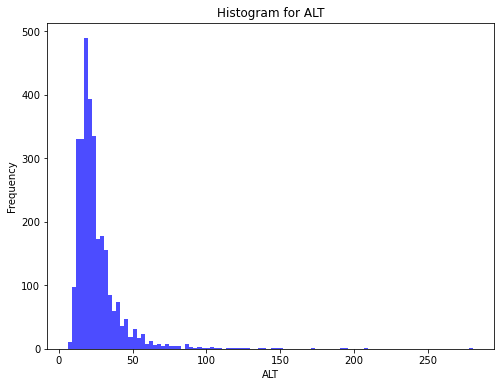

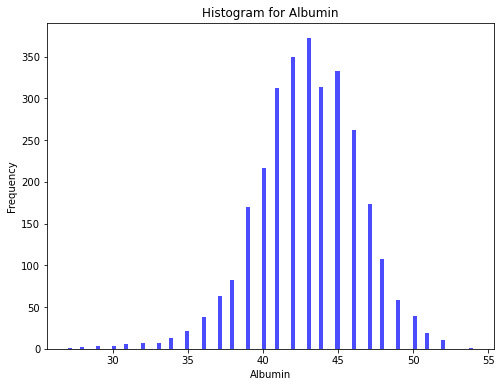

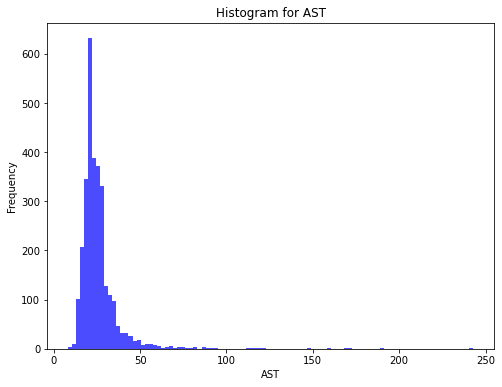

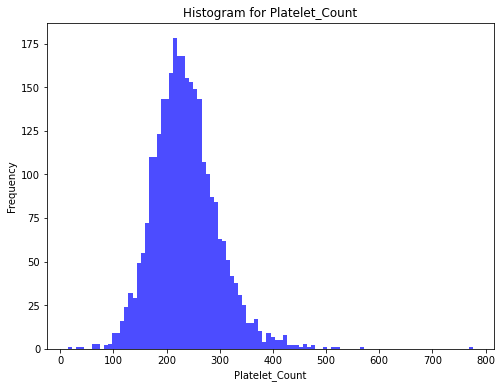

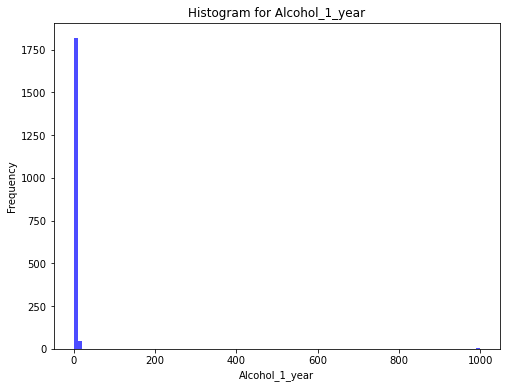

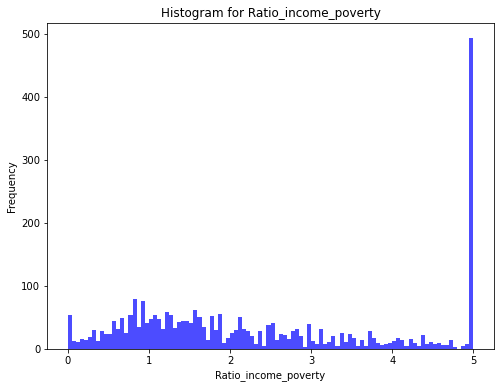

In [85]:
import matplotlib.pyplot as plt
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count', 'Alcohol_1_year', 'Ratio_income_poverty']

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(nhanes1516[~nhanes1516[column].isna()][column], bins=100, color='blue', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [86]:
#Impute ALT, AST, PLT, PST with medians
#Impute income poverty ratio with PSU weighted means
#Impute Alcohol 1 year with weighted means
#Delete rows where Categorical features are missing

In [87]:
# Deleting records where categorical columns have missing values
categorical_columns = ['Education_level','Marital_status','liver_condition']

# Drop rows with missing values in specified categorical columns
nhanes1516 = nhanes1516.dropna(subset=categorical_columns)

In [88]:
#Imputing biochemistry variables
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count']

# Impute missing values with median
for column in continuous_columns:
    median_value = nhanes1516[column].median()
    nhanes1516[column].fillna(median_value, inplace=True)

In [89]:
#Imputing alcohol_1_year
alcohol_column = 'Alcohol_1_year'
weights_column = '2_year_interview_weight'  

# Calculate the weighted mean for Alcohol_1_year
weighted_mean = (nhanes1516[alcohol_column] * nhanes1516[weights_column]).sum() / nhanes1516[weights_column].sum()

# Impute missing values with the weighted mean for Alcohol_1_year
nhanes1516[alcohol_column].fillna(weighted_mean, inplace=True)

In [90]:
nhanes1516.columns

Index(['Respondent_sequence_number', 'Core_Antibody', 'Surface_Antigen',
       'Surface_Antibody', 'Vaccination', 'resp_2', 'Data_release_cycle',
       'Gender', 'Age', 'Race_Ethnicity', 'Veteran_Status', 'Country_of_birth',
       'Citizenship_status', 'Education_level', 'Marital_status',
       '2_year_interview_weight', '2_year_MEC_weight', 'Masked_variance_PSU',
       'Masked_variance_stratum', 'Ratio_income_poverty',
       'HH_Country_of_Birth', 'No_Insurance', 'Private_Insurance',
       'Governement_Insurance', 'Alcohol_1_year', 'Health_care_1_year',
       'liver_condition', 'Blood_Transfusion', 'Hepatitis_C', 'ALT', 'Albumin',
       'AST', 'Platelet_Count'],
      dtype='object')

In [91]:
nhanes1516['concat'] = nhanes1516['Masked_variance_stratum'].astype(str) + '_' + nhanes1516['Masked_variance_PSU'].astype(str)

In [92]:
nhanes1516['product'] = nhanes1516['Ratio_income_poverty']*nhanes1516['2_year_interview_weight']

In [93]:
nhanes1516_temp = nhanes1516.groupby('concat').sum()['product'].reset_index()

In [94]:
nhanes1516_temp_2 = nhanes1516.groupby('concat').sum()['2_year_interview_weight'].reset_index()

In [95]:
nhanes1516_temp_3  = pd.merge(nhanes1516_temp, nhanes1516_temp_2, on="concat", how = "left")

In [96]:
nhanes1516_temp_3['rip'] = nhanes1516_temp_3['product']/nhanes1516_temp_3['2_year_interview_weight']

In [97]:
nhanes1516_temp_4 = nhanes1516_temp_3[['concat','rip']]

In [98]:
nhanes1516 = pd.merge(nhanes1516,nhanes1516_temp_4, on='concat', how='left')

# Fill missing values in col_to_fill with mapping_value
nhanes1516['Ratio_income_poverty'] = nhanes1516['Ratio_income_poverty'].fillna(nhanes1516['rip'])

In [99]:
nhanes1516 = nhanes1516.drop(columns=['product','rip'])

In [100]:
# Replace "missing" with NaN
nhanes1516.replace('missing', np.nan, inplace=True)

# Drop rows with any missing values
nhanes1516 = nhanes1516.dropna()

In [102]:
nhanes1516 = nhanes1516.drop(columns=['HH_Country_of_Birth'])

In [103]:
nhanes1516

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Country_of_birth,Citizenship_status,Education_level,Marital_status,2_year_interview_weight,2_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,liver_condition,Blood_Transfusion,Hepatitis_C,ALT,Albumin,AST,Platelet_Count,concat
0,83733.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,53.0,Non-Hispanic White,No,Other,Not a citizen,High School Grad/GED or Equivalent,Divorced,24328.560239,25282.425927,1.0,125.0,1.32,1,0,0,6.000000,0.0,No,No,No,35.0,45.0,31.0,170.0,125.0_1.0
1,83734.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,78.0,Non-Hispanic White,Yes,US,Citizen,High School Grad/GED or Equivalent,Married,12400.008522,12575.838818,1.0,131.0,1.51,0,1,1,2.139372,2 to 3,Yes,No,No,29.0,45.0,30.0,223.0,131.0_1.0
2,83737.0,Negative,Missing,Negative,No Doses,No Infection,9.0,Female,72.0,Mexican American,No,Other,Not a citizen,9-12th Grade,Separated,11252.311968,10878.684022,1.0,128.0,2.82,1,0,0,2.139372,2 to 3,No,No,No,17.0,41.0,22.0,123.0,128.0_1.0
3,83744.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,56.0,Non-Hispanic Black,No,US,Citizen,High School Grad/GED or Equivalent,Divorced,20395.535310,20068.662891,2.0,126.0,1.19,0,0,1,2.139372,6.0,No,No,No,63.0,40.0,47.0,146.0,126.0_2.0
4,83747.0,Negative,Missing,Negative,No Doses,HBV Infection,9.0,male,46.0,Non-Hispanic White,No,Other,Citizen,College Graduate or above,Living with partner,34513.077877,35673.964272,1.0,121.0,0.75,0,0,1,1.000000,4 to 9,No,No,No,58.0,42.0,45.0,268.0,121.0_1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,93685.0,Negative,Missing,Negative,Don't know,No Infection,9.0,male,53.0,Mexican American,No,Other,Not a citizen,9-12th Grade,Married,22441.858682,22794.734098,1.0,126.0,0.49,0,0,1,2.000000,2 to 3,No,No,No,32.0,47.0,25.0,166.0,126.0_1.0
3385,93689.0,Negative,Missing,Negative,No Doses,No Infection,9.0,Female,69.0,Mexican American,No,US,Citizen,Less Than 9th Grade,Married,9611.185655,11665.798762,2.0,127.0,0.97,0,0,1,2.139372,2 to 3,No,Yes,No,52.0,39.0,44.0,211.0,127.0_2.0
3386,93691.0,Negative,Missing,Negative,No Doses,No Infection,9.0,male,25.0,Non-Hispanic Asian,No,Other,Not a citizen,College Graduate or above,Never married,13525.392079,13782.067680,2.0,133.0,1.59,0,1,1,2.139372,1,No,No,No,21.0,48.0,34.0,253.0,133.0_2.0
3387,93695.0,Negative,Missing,Negative,Don't know,No Infection,9.0,Female,76.0,Non-Hispanic White,No,US,Citizen,High School Grad/GED or Equivalent,Widowed,58614.075016,66678.487176,2.0,130.0,1.43,0,1,1,2.139372,10 to 12,No,No,No,13.0,41.0,22.0,135.0,130.0_2.0
